In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
df = pd.read_csv('datasets/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [8]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [10]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [12]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Visualization

Text(0.5, 1.0, 'Age Distribution')

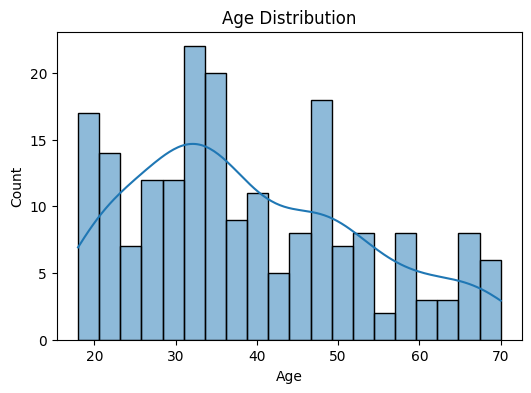

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')


Text(0.5, 1.0, 'Age Distribution')

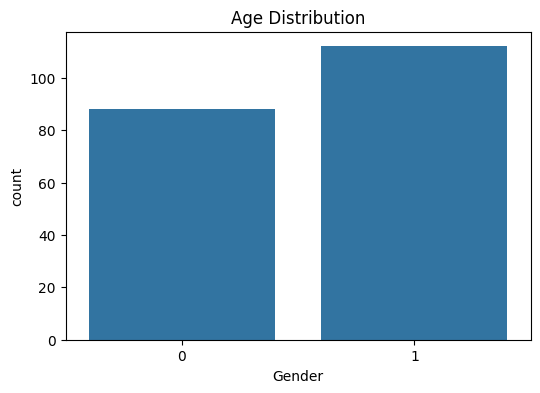

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Annual Income vs Spending')

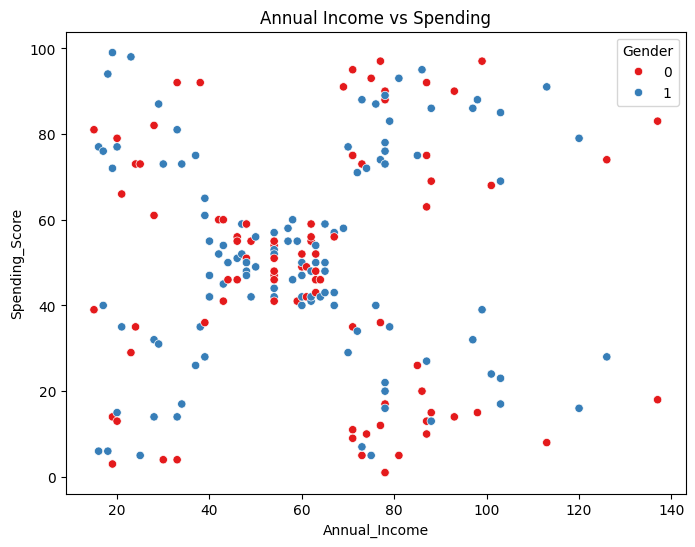

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue='Gender', palette='Set1')
plt.title('Annual Income vs Spending')

Scaling

In [20]:
X = df[['Age', 'Annual_Income', 'Spending_Score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

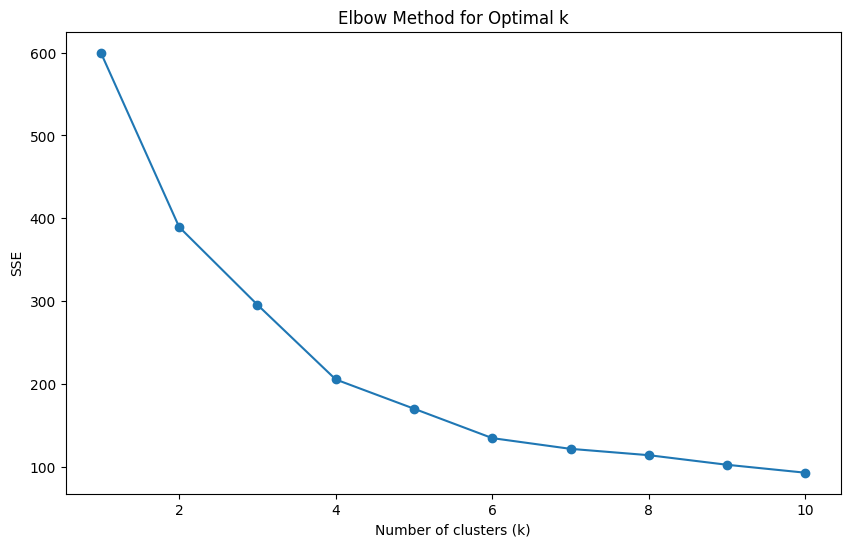

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(K, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

In [25]:
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [27]:
df['Cluster'] = labels

C:\Users\sushi\AppData\Local\Temp\ipykernel_21184\3047252599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set1')


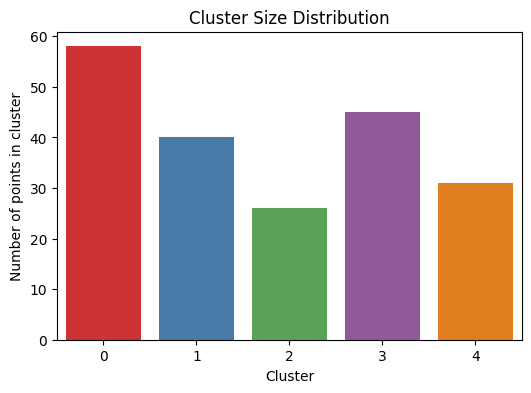

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df, palette='Set1')
plt.title('Cluster Size Distribution')
plt.ylabel('Number of points in cluster')
plt.show()

In [31]:
print('Cluster Centers (Standardized): ')
print(kmeans.cluster_centers_)

Cluster Centers (Standardized): 
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]


### Cluster Summaries

- **Cluster 1: [1.18, -0.49, -0.33]**
  - **Age**: +1.18 σ (Older)
  - **Income**: -0.49 σ (Below avg)
  - **Spending**: -0.33 σ (Below avg)
  - **Interpretation**: Older, modest income, conservative spenders

- **Cluster 2: [-0.43, 0.97, 1.22]**
  - **Age**: -0.43 σ (Younger)
  - **Income**: +0.97 σ (Above avg)
  - **Spending**: +1.22 σ (High)
  - **Interpretation**: Young, affluent, high spenders

- **Cluster 3: [-0.94, -1.31, 0.96]**
  - **Age**: -0.94 σ (Very young)
  - **Income**: -1.31 σ (Very low)
  - **Spending**: +0.96 σ (Above avg)
  - **Interpretation**: Budget-limited youth, likely students

- **Cluster 4: [-0.87, -0.24, -0.36]**
  - **Age**: -0.87 σ (Younger)
  - **Income**: -0.24 σ (Slightly low)
  - **Spending**: -0.36 σ (Low)
  - **Interpretation**: Young, cautious spenders

- **Cluster 5: [0.40, 1.12, -1.23]**
  - **Age**: +0.40 σ (Middle-aged)
  - **Income**: +1.12 σ (High)
  - **Spending**: -1.23 σ (Very low)
  - **Interpretation**: Affluent, conservative buyers

### Business Implications

- **Cluster 1**: Promote value deals & loyalty rewards  
- **Cluster 2**: Target with premium, trendy products  
- **Cluster 3**: Offer student discounts & budget trends  
- **Cluster 4**: Focus on practical deals & offers  
- **Cluster 5**: Provide exclusivity & elite service  


### Technical Insight

- Standardized scores enable direct feature comparison  
- Value magnitudes highlight key segment traits  
- Derived from K-means scaled input data

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

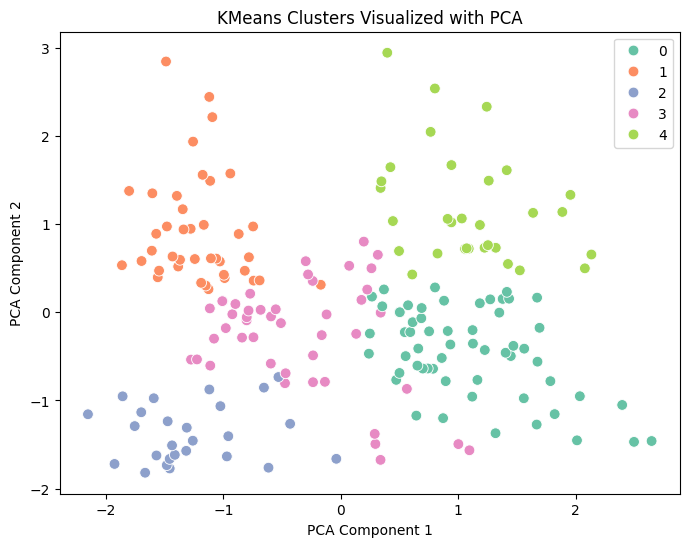

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:,1], hue=labels, palette='Set2', s=60)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [34]:
score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.41


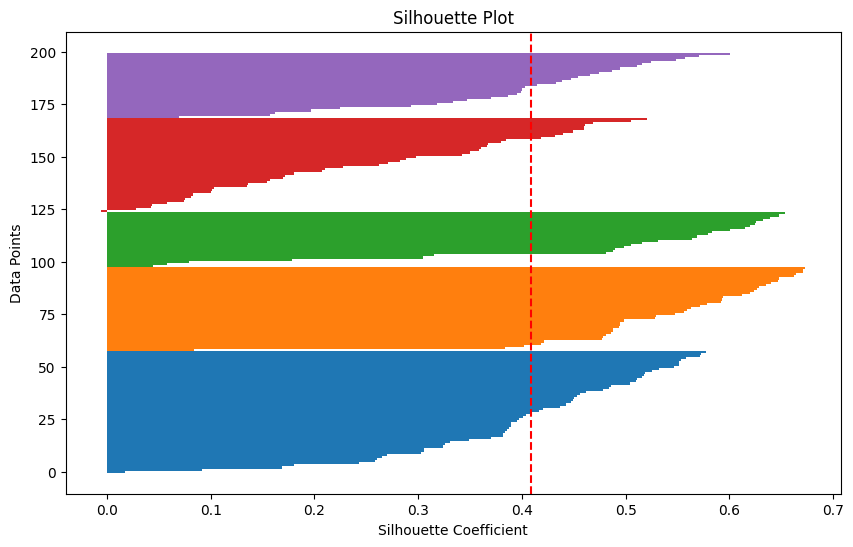

In [35]:
silhouette_vals = silhouette_samples(X_scaled, labels)
plt.figure(figsize=(10,6))
y_lower = 0
for i in range(k_optimal):
    cluster_sil_vals = silhouette_vals[labels == i]
    cluster_sil_vals.sort()
    y_upper = y_lower + len(cluster_sil_vals)
    plt.barh(range(y_lower, y_upper), cluster_sil_vals, edgecolor='none', height=1)
    y_lower = y_upper
plt.axvline(np.mean(silhouette_vals), color='red', linestyle='--')
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Data Points')
plt.show()

Cluster Profiles:
               Age  Annual_Income  Spending_Score
Cluster                                          
0        55.275862      47.620690       41.706897
1        32.875000      86.100000       81.525000
2        25.769231      26.115385       74.846154
3        26.733333      54.311111       40.911111
4        44.387097      89.774194       18.483871


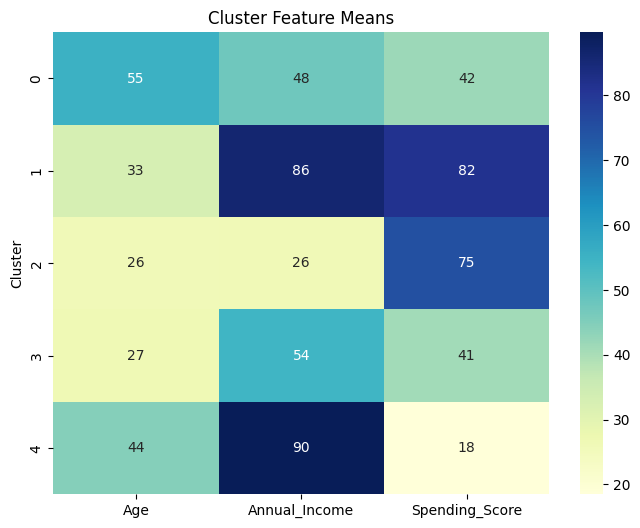

In [36]:
cluster_profiles = df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean()
print('Cluster Profiles:')
print(cluster_profiles)

plt.figure(figsize=(8,6))
sns.heatmap(cluster_profiles, annot=True, cmap='YlGnBu')
plt.title('Cluster Feature Means')
plt.show()